Step 1: importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import pylab as pl
%matplotlib inline



ModuleNotFoundError: No module named 'matplotlib'

Step 2: importing the dataset

In [2]:
data=pd.read_csv("dataset/FuelConsumption.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 639 entries, 0 to 638
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              639 non-null    int64  
 1   MAKE              639 non-null    object 
 2   MODEL             639 non-null    object 
 3   VEHICLE CLASS     639 non-null    object 
 4   ENGINE SIZE       639 non-null    float64
 5   CYLINDERS         639 non-null    int64  
 6   TRANSMISSION      639 non-null    object 
 7   FUEL              639 non-null    object 
 8   FUEL CONSUMPTION  639 non-null    float64
 9   COEMISSIONS       639 non-null    int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 50.1+ KB


In [3]:
data.describe()

,Year,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,COEMISSIONS
count,639.0,639.000000,639.000000,639.000000,639.000000
mean,2000.0,3.265728,5.805947,14.713615,296.809077
std,0.0,1.231012,1.625588,3.307044,65.504178
min,2000.0,1.000000,3.000000,4.900000,104.000000
25%,2000.0,2.200000,4.000000,12.500000,253.000000
50%,2000.0,3.000000,6.000000,14.400000,288.000000
75%,2000.0,4.300000,6.000000,16.600000,343.000000
max,2000.0,8.000000,12.000000,30.200000,582.000000


Step 3: check whether the dataset has missing data


In [4]:
data.isnull()

,Year,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,COEMISSIONS
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
634,False,False,False,False,False,False,False,False,False,False
635,False,False,False,False,False,False,False,False,False,False
636,False,False,False,False,False,False,False,False,False,False
637,False,False,False,False,False,False,False,False,False,False


Step 4: handling the missing data

no any misssing data here

Step 5: describe the dataset by matplotlib

In [5]:
des=data[['Year','ENGINE SIZE','CYLINDERS','FUEL CONSUMPTION']]
des.head()

,Year,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION
0,2000,1.6,4,10.5
1,2000,1.6,4,9.8
2,2000,3.2,6,13.7
3,2000,3.5,6,15.0
4,2000,1.8,4,11.4


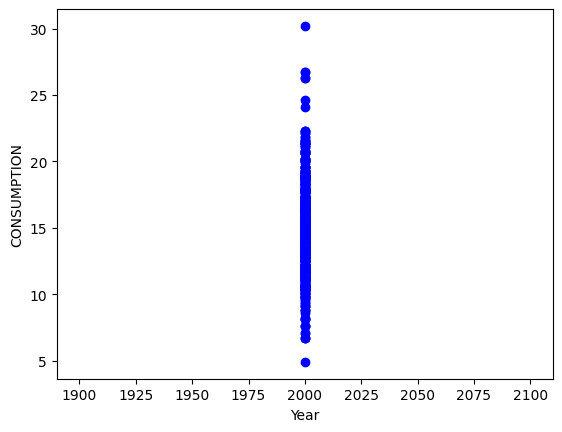

In [6]:
plt.pyplot.scatter(des["Year"],des["FUEL CONSUMPTION"], color="blue")
plt.pyplot.xlabel("Year")
plt.pyplot.ylabel("CONSUMPTION")
plt.pyplot.show()

Step 6: Encoding categorical data 

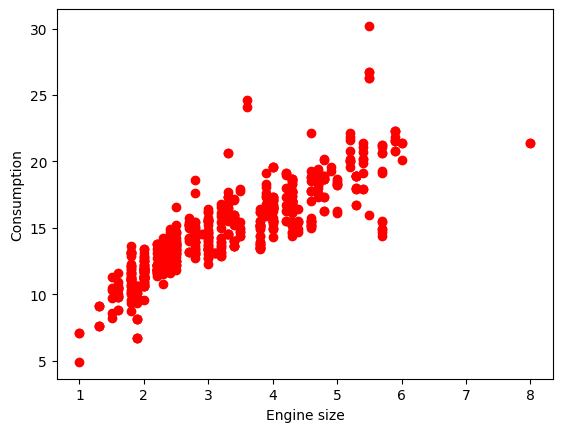

In [7]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

msk =np.random.rand(len(des))<0.8
train=des[msk]
test= des[~msk]

plt.pyplot.scatter(des["ENGINE SIZE"],des["FUEL CONSUMPTION"], color="red")
plt.pyplot.xlabel("Engine size")
plt.pyplot.ylabel("Consumption")
plt.pyplot.show()



Step 7: Train model

In [8]:
from sklearn import linear_model
regre= linear_model.LinearRegression()
x= np.asanyarray(train[['ENGINE SIZE','FUEL CONSUMPTION']])
y= np.asanyarray(train[['CYLINDERS']])
regre.fit(x,y)

print(regre.coef_)

[[0.87205288 0.13029567]]


Step 8: predicting

In [9]:
x=np.asanyarray(test[['ENGINE SIZE','FUEL CONSUMPTION']])
y=np.asanyarray(test[['CYLINDERS']])
print('Variance score: %.2f' % regre.score(x, y))

Variance score: 0.79
